In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings


Bad key text.latex.preview in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
warnings.simplefilter('ignore')

In [3]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [4]:
path = './data/'

df = pd.read_csv(path+'전처리된_전체_데이터.csv')

In [5]:
df

,Year,Month,Region_Name,Building_Age,Building_Use,JS_Price,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,위도,경도
0,2011,1,관악구,6,오피스텔,12000,25.05,521193,2.75,3.8,72.0,78.2,74.2,NaN,81.2,15800.00,NaN,37.474500,126.981390
1,2011,2,관악구,6,오피스텔,10000,25.05,521193,2.75,4.5,72.3,78.2,74.5,NaN,82.0,16875.00,NaN,37.474500,126.981390
2,2011,2,관악구,6,오피스텔,10500,26.18,521193,2.75,4.5,72.3,78.2,74.5,NaN,82.0,16875.00,NaN,37.474500,126.981390
3,2011,5,관악구,6,오피스텔,12000,27.15,521193,3.00,3.2,72.6,78.9,75.8,NaN,80.6,17216.67,NaN,37.474500,126.981390
4,2011,10,관악구,6,오피스텔,11500,27.15,521193,3.25,2.9,72.9,80.0,77.1,NaN,79.4,22000.00,NaN,37.474500,126.981390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189429,2022,11,송파구,14,아파트,96900,84.80,652993,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,193312.50,NaN,37.514069,127.081381
1189430,2022,11,서초구,17,아파트,25500,29.60,402936,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,33000.00,NaN,37.486044,126.984201
1189431,2022,11,강서구,6,오피스텔,15180,25.55,567898,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,18125.00,NaN,37.560579,126.837594
1189432,2022,11,송파구,9,오피스텔,19800,26.82,652993,3.25,2.3,109.7,108.9,111.8,72.039914,146.8,21100.00,NaN,37.480095,127.119684


In [6]:
df.drop('Region_Name', axis=1, inplace=True)
df.drop('Building_Use', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189434 entries, 0 to 1189433
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Year          1189434 non-null  int64  
 1   Month         1189434 non-null  int64  
 2   Building_Age  1189434 non-null  int64  
 3   JS_Price      1189434 non-null  int64  
 4   JS_BA         1189434 non-null  float64
 5   Population    1189434 non-null  int64  
 6   IR            1182725 non-null  float64
 7   UR            1182725 non-null  float64
 8   LC_index      1182725 non-null  float64
 9   CA_index      1182725 non-null  float64
 10  TC_index      1182725 non-null  float64
 11  SDT_index     1040988 non-null  float64
 12  HSP_index     1166201 non-null  float64
 13  Sell_Price    1189434 non-null  float64
 14  Crime_Rates   793796 non-null   float64
 15  위도            1189434 non-null  float64
 16  경도            1189434 non-null  float64
dtypes: float64(12), int64(5)
me

## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - YearMonth : 년월
    - Building_Age : 건물연식
    - JS_Price : 전세가
   
- Continous
    - Sell_Price : 매매 가격
    - JS_BA = JS_Building Area : 임대 면적
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    - HSP_index = 
    - Population : 인구수
    - Crime_Rates : 범죄율
    - Shortest_Distance_to_Subway : 가장 가까운 지하철역과의 거리
    - Shortest_Distance_to_School : 가장 가까운 초중고등학교와의 거리
    - Shortest_Distance_to_Univ : 가장 가까운 대학교와의 거리
    - Shortest_Distance_to_Park : 가장 가까운 공원과의 거리
    

## 데이터 전처리

### 이상치 제거

In [8]:
def detect_outliers(df, features_to_process):

    df_cleaned = df.copy()
    
    for feature in features_to_process:
        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # IQR 범위 밖의 데이터를 이상치로 간주하고 제거
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
    
    return df_cleaned

In [9]:
df = detect_outliers(df, [df.columns])

In [10]:
df.dropna(inplace=True)

### 범주형 변수 인코딩

In [11]:
# 범주형 변수 더미화 함수, 범주형 변수의 범주 레벨 간의 관계가 중요할 시 사용
def oh_encoding(df):
    # DataFrame의 복사본을 만듭니다.
    df_encoded = df.copy()
    columns_encoded = []
    for column in df.columns:
        if df[column].dtype == object:
            df_encoded = pd.get_dummies(df_encoded, columns=[column], prefix=column)
            columns_encoded.append(column)
    return df_encoded, columns_encoded

In [12]:
df_encoded, columns_encoded = oh_encoding(df)

### 전체 변수 스케일링

In [13]:
# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열 선택 (수치형 데이터만, 원핫인코딩 열 제외)
numeric_columns = df_encoded.select_dtypes(include=['float', 'int']).columns
numeric_columns = [col for col in numeric_columns if col not in columns_encoded]

# 데이터 정규화
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

## DF 사전진단

### 선형패턴 확인

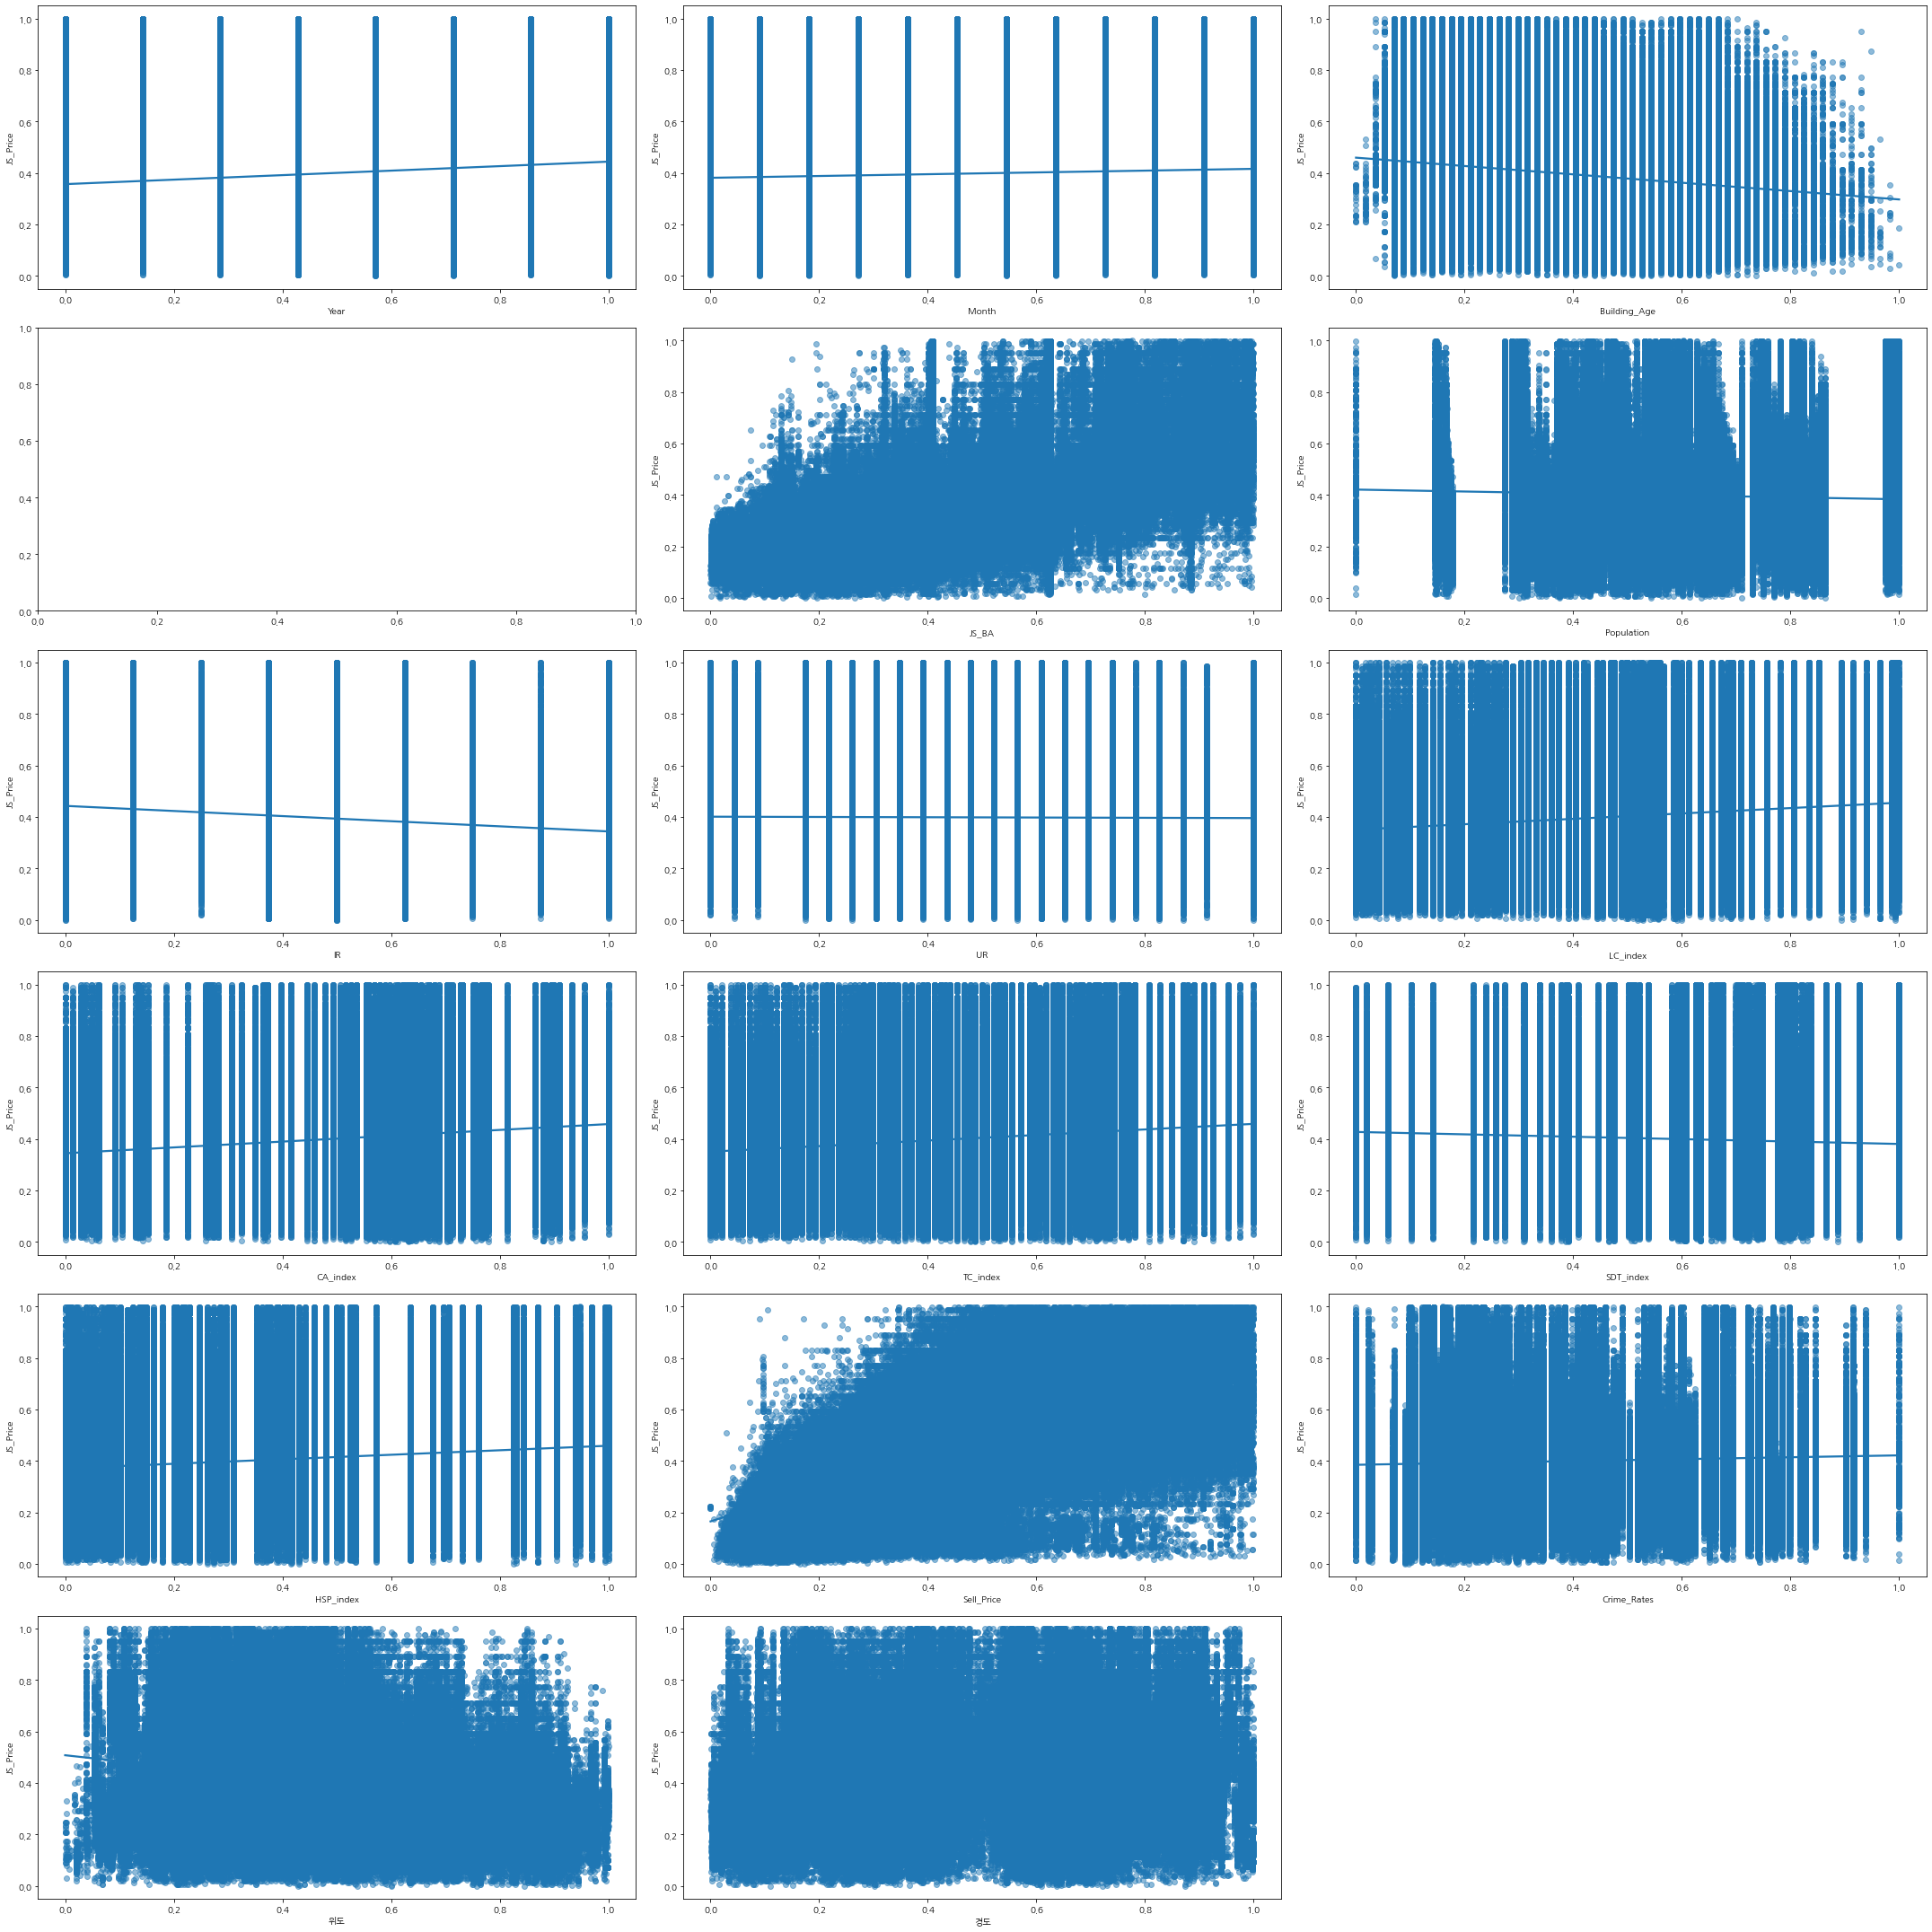

In [14]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30,30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 독립 변수와 종속 변수 간의 선형 관계 확인
for i, independent_column in enumerate(df_encoded.columns):
    if independent_column != 'JS_Price':
        if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
            sns.regplot(x=independent_column, y='JS_Price', data=df_encoded, ax=ax[i], scatter_kws={'alpha': 0.5})
            ax[i].set_xlabel(independent_column)
            ax[i].set_ylabel('JS_Price')

# 남은 subplot 비우기
for i in range(len(df_encoded.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### 이상치 확인

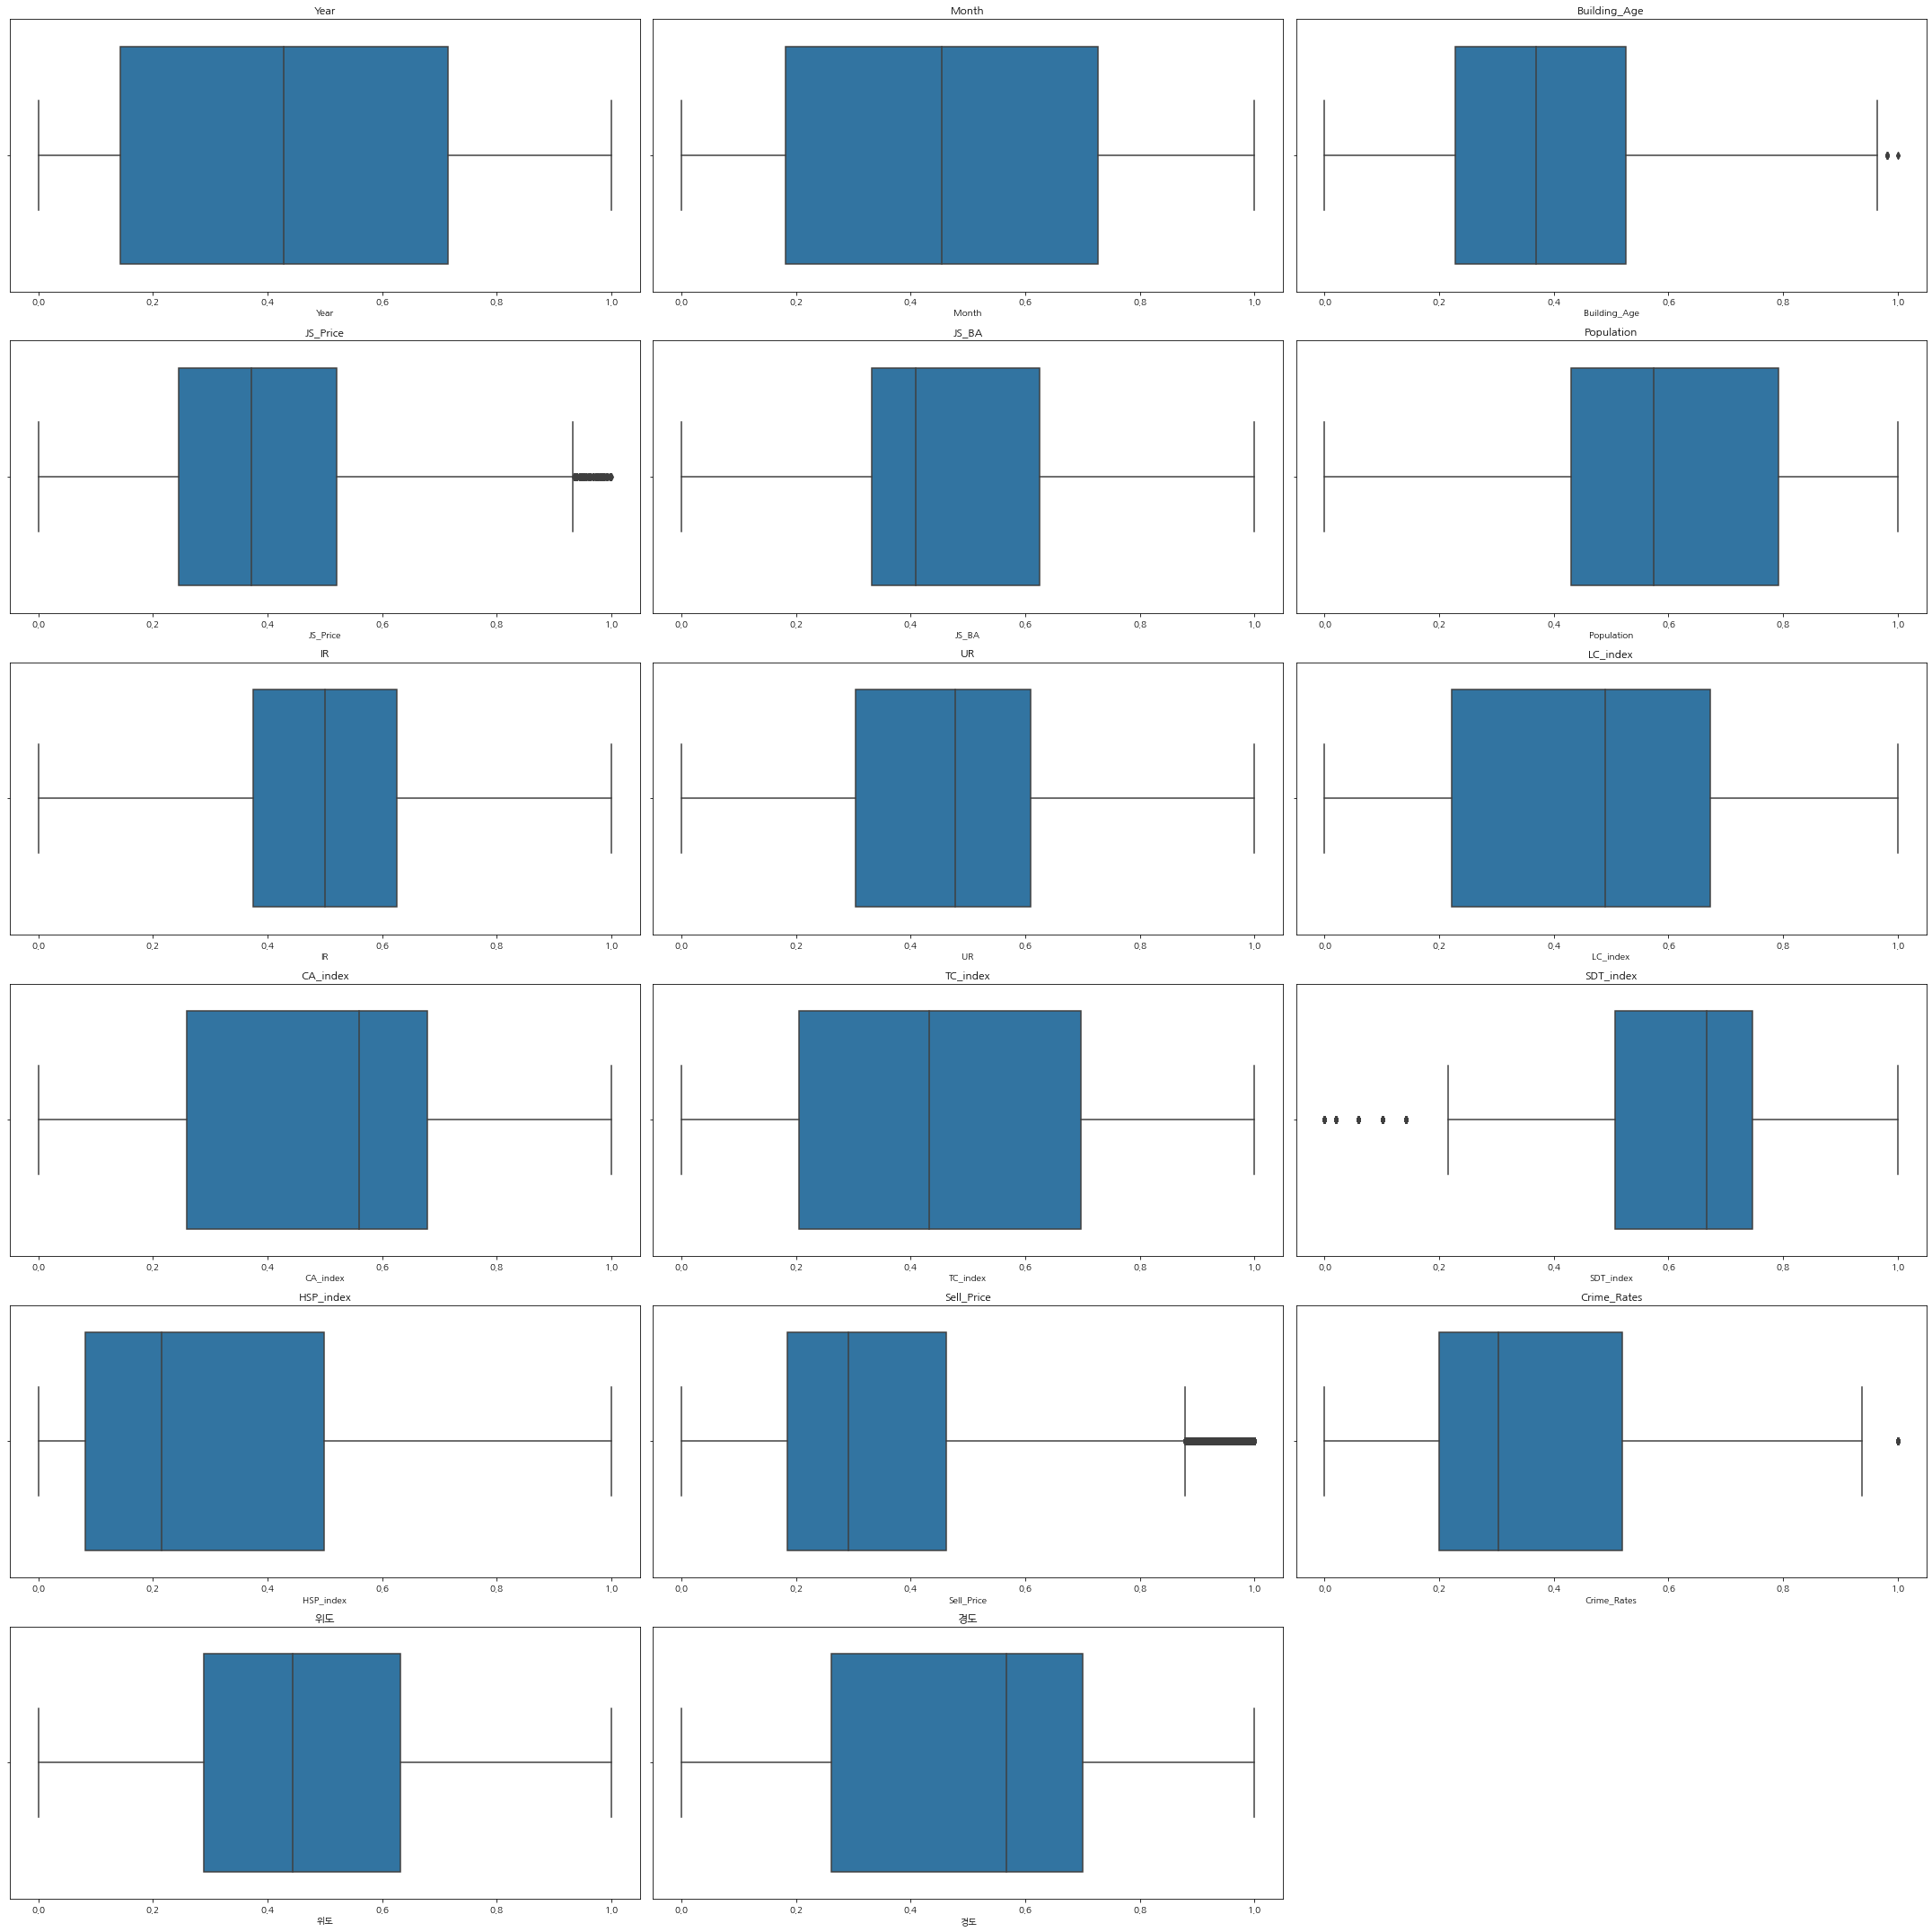

In [15]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 그래프를 그릴 컬럼 목록
columns_to_plot = [column for column in df_encoded.columns]

for i, column in enumerate(columns_to_plot):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.boxplot(x=column, data=df_encoded, ax=ax[i], orient='v')
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### 정규성 확인

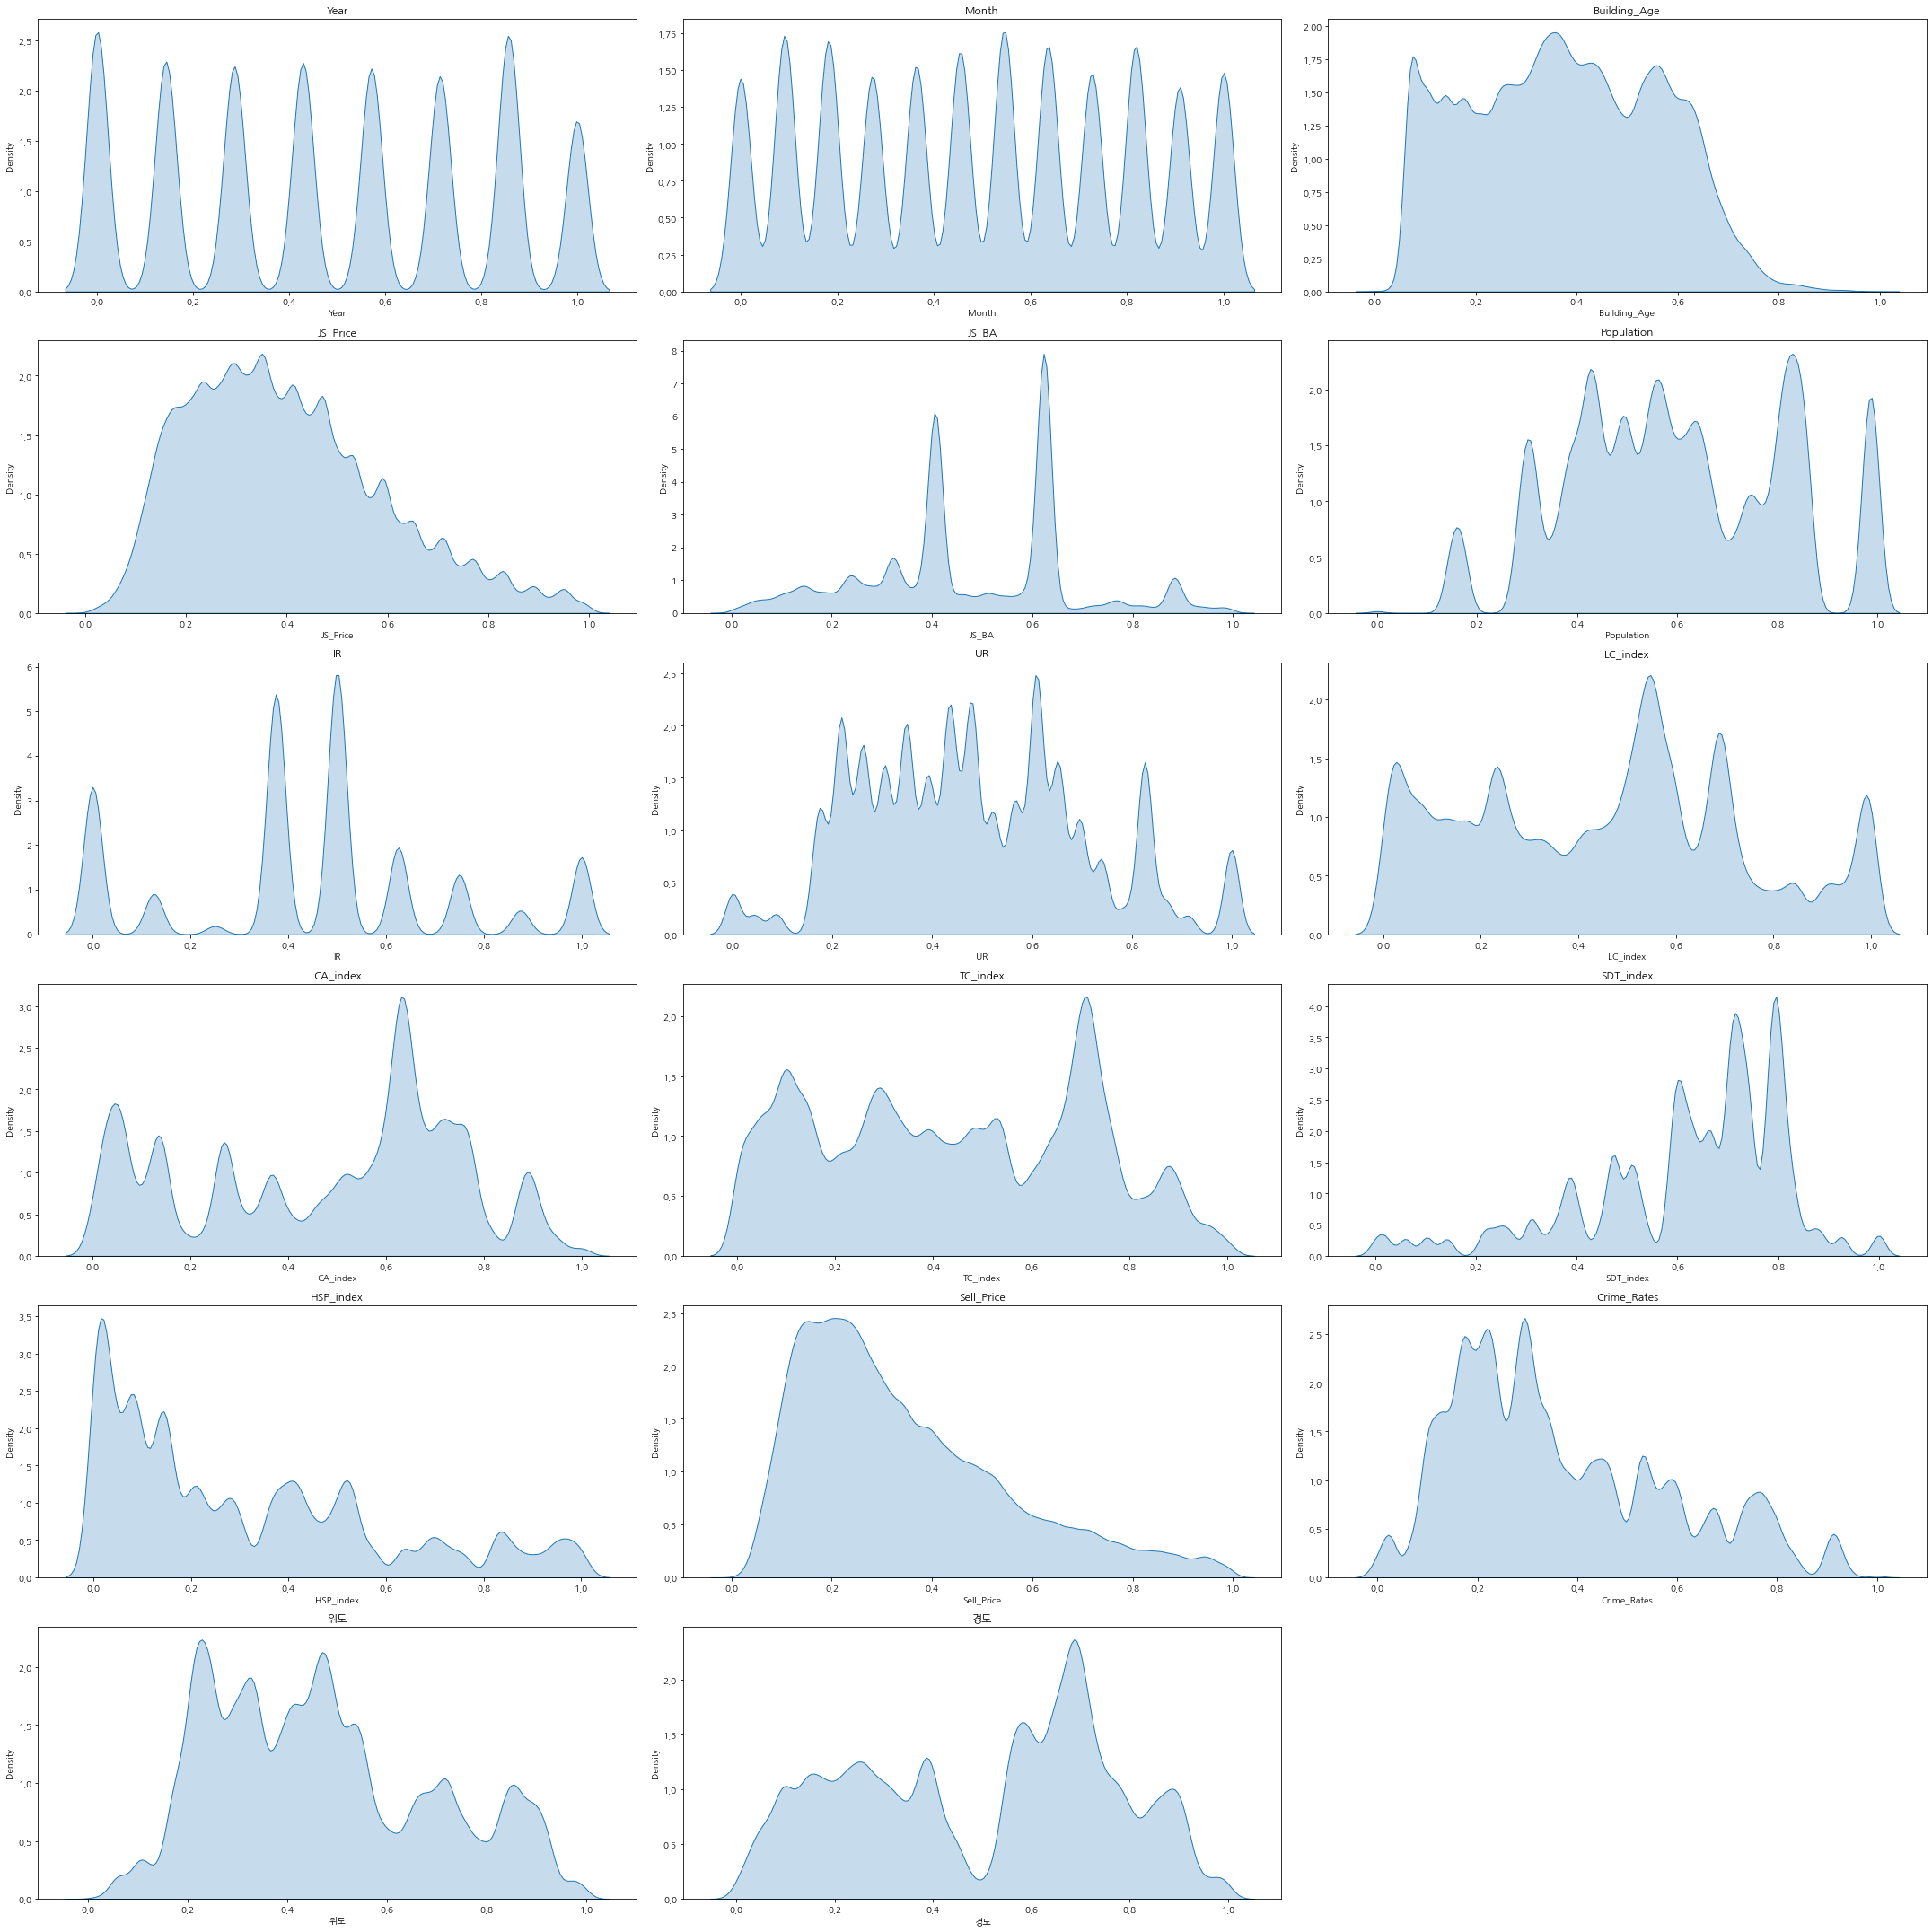

In [16]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 그래프를 그릴 컬럼 목록
columns_to_plot = [column for column in df_encoded.columns]

for i, column in enumerate(columns_to_plot):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.kdeplot(data=df_encoded[column], ax=ax[i], shade=True)
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [17]:
for column in df_encoded.columns:
    print(f"{column}의 왜도는", scipy.stats.skew(df_encoded[column]))

Year의 왜도는 0.03181588209543779
Month의 왜도는 0.018569246198689465
Building_Age의 왜도는 0.09126718250891501
JS_Price의 왜도는 0.6505915088643576
JS_BA의 왜도는 0.0669244001238023
Population의 왜도는 0.07780096237867758
IR의 왜도는 0.09412891426701095
UR의 왜도는 0.2847139648754662
LC_index의 왜도는 0.14317700140200382
CA_index의 왜도는 -0.30014446402348616
TC_index의 왜도는 0.06393372864753206
SDT_index의 왜도는 -1.0374844930392961
HSP_index의 왜도는 0.8670770825970588
Sell_Price의 왜도는 0.9564701177406979
Crime_Rates의 왜도는 0.7053097296558944
위도의 왜도는 0.4566193750855266
경도의 왜도는 -0.16292420583967174


## Regression Analysis

In [18]:
selected_features = ['Building_Age',
 'HSP_index',
 'Sell_Price',
 'Year',
 'TC_index',
 '위도',
 'LC_index',
 'JS_BA',
 'CA_index',
 'IR']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 1.907e+05
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:54:46   Log-Likelihood:             6.0443e+05
No. Observations:              683189   AIC:                        -1.209e+06
Df Residuals:                  683178   BIC:                        -1.209e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1664      0.001    120.025   

## 변수선택법
- 다중공선성과 회귀계수의 통계적 유의성 고려하여 진행

In [19]:
# X 데이터에서 상수항 제거 (VIF 계산에서 상수항은 제외해야 함)
X_without_constant = X.drop('const', axis=1)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X_without_constant.columns
vif["VIF"] = [variance_inflation_factor(X_without_constant.values, i) for i in range(X_without_constant.shape[1])]

In [20]:
vif

,Features,VIF
0,Building_Age,5.125031
1,HSP_index,83.713788
2,Sell_Price,6.126557
3,Year,185.481522
4,TC_index,547.559230
5,위도,6.009962
6,LC_index,547.833830
7,JS_BA,8.415559
8,CA_index,309.891940
9,IR,5.836270


In [21]:
model = pd.DataFrame(model.summary().tables[1])
model

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,0.1664,0.001,120.025,0.000,0.164,0.169
2,Building_Age,-0.2586,0.001,-391.649,0.000,-0.260,-0.257
3,HSP_index,-0.1063,0.004,-25.725,0.000,-0.114,-0.098
4,Sell_Price,0.5029,0.001,673.985,0.000,0.501,0.504
5,Year,-0.0466,0.003,-15.661,0.000,-0.052,-0.041
6,TC_index,-0.0718,0.006,-12.323,0.000,-0.083,-0.060
7,위도,-0.0691,0.001,-118.849,0.000,-0.070,-0.068
8,LC_index,0.1224,0.009,13.712,0.000,0.105,0.140
9,JS_BA,0.4147,0.001,601.691,0.000,0.413,0.416


In [22]:
delete_columns = []
for i in range(2, len(model.index)):
    if float(model.iloc[i, 4].data) > 0.05 and vif['VIF'].iloc[i-2] > 10:
        delete_columns.append(model.iloc[i, 0].data)
delete_columns

[]

In [23]:
selected_features = list(set(selected_features) - set(delete_columns))
selected_features

['Sell_Price',
 'TC_index',
 'JS_BA',
 'Building_Age',
 'LC_index',
 'Year',
 'HSP_index',
 '위도',
 'CA_index',
 'IR']

In [24]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 1.907e+05
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:54:51   Log-Likelihood:             6.0443e+05
No. Observations:              683189   AIC:                        -1.209e+06
Df Residuals:                  683178   BIC:                        -1.209e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1664      0.001    120.025   

In [25]:
selected_features.remove('TC_index')
selected_features.remove('LC_index')

In [26]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 2.382e+05
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:54:51   Log-Likelihood:             6.0421e+05
No. Observations:              683189   AIC:                        -1.208e+06
Df Residuals:                  683180   BIC:                        -1.208e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1782      0.001    224.963   

- 모든 변수가 통계적으로 유의한 것을 확인할 수 있다.

## 모델가정 확인

### 선형성
- 선형성은 계수의 유의성 검정과 다중공선성을 고려하여 변수를 걸러냄으로써 어느 정도 만족하는 것으로 보인다.

In [ ]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})

plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

### 정규성

In [ ]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# Scatterplot 그리기
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# Shapiro-Wilk 정규성 검정
scipy.stats.shapiro(residual)

- 정규성 만족을 위해 종속변수 로그변환한 뒤 다시 정규성 확인

In [ ]:
df_encoded['JS_Price'] = np.log(df_encoded['JS_Price']+1)

In [ ]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

In [ ]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Scatterplot 그리기
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# Shapiro-Wilk 정규성 검정
scipy.stats.shapiro(residual)

### 등분산성

In [ ]:
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

### 독립성

In [ ]:
print(model.summary().tables[2])

- Durbin-Watson:1.991로 1.5~2.5사이이므로 잔차 간의 자기상관이 없다고 할 수 있으며, 회귀 모델은 독립성 가정을 만족

## 최종 모델 점검

In [ ]:
print(model.summary())

In [ ]:
model.params.sort_values(ascending=False)